##### Import Required Library

In [180]:
entropy and critic methods

SyntaxError: invalid syntax (Temp/ipykernel_7812/429738093.py, line 1)

In [1]:
# Importing the required library
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### Read data from excel file

In [2]:
# read excel using read_excel function of pandas
courses=pd.read_excel('Course Dataset.xlsx',sheet_name=1)
rating=pd.read_excel('Course Dataset.xlsx',sheet_name=2)

## Basic data checks
Check size/shape of data.<br>
Look at few records.<br>
Check for duplicates.<br>
Check Unique values in string based columns.<br>
Check for null entries.<br>

In [3]:
courses.shape

(891, 7)

In [4]:
rating.shape

(5, 3)

In [5]:
courses.head()

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,1,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,2,A Crash Course in Causality: Inferring Causal ...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,3,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,4,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,5,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [6]:
#Check if duplicates are avaialble in data
courses.duplicated().sum()

0

In [7]:
rating

,Min Rating,Max Rating,Feedback Categegory
0,4.8,5.00,Excellent
1,4.5,4.79,Good
2,4.0,4.49,Average
3,3.5,3.99,Below Average
4,3.0,3.49,Not Good


In [8]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.No                      891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   888 non-null    object 
 4   course_rating             881 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


##### Check if data need to convert in upper
course_Certificate_type needs to be converted to upper as it has both upper and lower entries.
But its always better to convert all into upper or lower case 

In [9]:
# check values in str columns if it has entries in both lower and upper case.By using nunique function.
for col in courses.columns:
    if courses[col].dtype == 'object':
        print(col, courses[col].nunique(),courses[col].str.upper().nunique())

course_title 888 888
course_organization 154 154
course_Certificate_type 11 9
course_difficulty 4 4
course_students_enrolled 205 205


In [10]:
# course_Certificate_type has entries in both case and also need some spelling correction.
courses['course_Certificate_type'].value_counts()

COURSE                       570
SPECIALIZATION               290
course                         8
PROFESSIONAL CERTIFICATE       7
specialization                 3
specializatoin                 2
SPCEIALIZATION                 2
PROFESSION CERTIFICATE         2
PROFESSIOAL CERTIFICATE        2
PROFESSIONAL  CERTIFICATE      1
COU RSE                        1
Name: course_Certificate_type, dtype: int64

In [11]:
# Convert data into upper case
for col in courses.columns:
    if courses[col].dtype == 'object':
        courses[col]=courses[col].str.upper()

In [12]:
courses['course_Certificate_type'].value_counts()

COURSE                       578
SPECIALIZATION               293
PROFESSIONAL CERTIFICATE       7
SPECIALIZATOIN                 2
SPCEIALIZATION                 2
PROFESSION CERTIFICATE         2
PROFESSIOAL CERTIFICATE        2
PROFESSIONAL  CERTIFICATE      1
COU RSE                        1
Name: course_Certificate_type, dtype: int64

### correct spelling in course_Certificate_type column 
COU RSE to COURSE <br>
SPECIALIZATOIN and SPCEIALIZATION to  SPECIALIZATION to SPECIALIZATION <br>
PROFESSION CERTIFICATE, PROFESSIOAL CERTIFICATE and PROFESSIONAL  CERTIFICATE  to PROFESSIONAL CERTIFICATE

In [13]:
courses['course_Certificate_type'] = courses['course_Certificate_type'].str.replace('COU RSE',"COURSE")

In [14]:
courses['course_Certificate_type'] =courses['course_Certificate_type'].apply(lambda X :'SPECIALIZATION' if str(X).startswith('SP') else X)

In [15]:
courses['course_Certificate_type'] = courses['course_Certificate_type'].apply(lambda X :'PROFESSIOAL CERTIFICATE' if str(X).startswith('PROFESSION') else X)

In [16]:
courses['course_Certificate_type'].value_counts()

COURSE                     579
SPECIALIZATION             297
PROFESSIOAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

In [17]:
courses.head()

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,1,(ISC)² SYSTEMS SECURITY CERTIFIED PRACTITIONER...,(ISC)²,SPECIALIZATION,4.7,BEGINNER,5.3K
1,2,A CRASH COURSE IN CAUSALITY: INFERRING CAUSAL ...,UNIVERSITY OF PENNSYLVANIA,COURSE,4.7,INTERMEDIATE,17K
2,3,A CRASH COURSE IN DATA SCIENCE,JOHNS HOPKINS UNIVERSITY,COURSE,4.5,MIXED,130K
3,4,A LAW STUDENT'S TOOLKIT,YALE UNIVERSITY,COURSE,4.7,MIXED,91K
4,5,A LIFE OF HAPPINESS AND FULFILLMENT,INDIAN SCHOOL OF BUSINESS,COURSE,4.8,MIXED,320K


##### NUll Entries in data:
course_Certificate_type has 3 null records
course_rating has 10 null record

In [18]:
for col in courses.columns:
    print(col,courses[col].isna().sum())

S.No 0
course_title 0
course_organization 0
course_Certificate_type 3
course_rating 10
course_difficulty 0
course_students_enrolled 0


#### Handling Null Values

Observed that there are ratings which are more than 5, so we willmake those as null and then fill with mean value.<br>
First we will check the mean of rating is varying based on Organization/course_difficulty.<br>
But observed that mean is not varying so fill the nan value with man of overall level rating. 


In [19]:
#check distinct values
courses['course_rating'].value_counts()

4.8     251
4.7     249
4.6     163
4.5      79
4.9      67
4.4      34
4.3      15
4.2      10
3.9       2
5.0       2
4.0       2
4.1       1
3.7       1
10.0      1
3.3       1
12.0      1
9.0       1
6.1       1
Name: course_rating, dtype: int64

In [20]:
# records with more than 5 rating
courses[courses['course_rating']>5]

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
53,54,ANTIMICROBIAL RESISTANCE - THEORY AND METHODS,TECHNICAL UNIVERSITY OF DENMARK (DTU),COURSE,9.0,INTERMEDIATE,63K
92,93,BIOSTATISTICS IN PUBLIC HEALTH,JOHNS HOPKINS UNIVERSITY,SPECIALIZATION,10.0,BEGINNER,14K
120,121,BUSINESS WRITING,UNIVERSITY OF COLORADO BOULDER,COURSE,12.0,BEGINNER,48K
620,621,NANOTECHNOLOGY: A MAKER’S COURSE,DUKE UNIVERSITY,COURSE,6.1,MIXED,21K


In [21]:
# convert ratings more than 5 to nan value
courses['course_rating'] = courses['course_rating'].apply(lambda X : np.nan if X>5 else X)

In [22]:
# total records with nan as rating
courses[courses['course_rating'].isna()]

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
10,11,AI FOR MEDICAL PROGNOSIS,DEEPLEARNING.AI,COURSE,NaN,INTERMEDIATE,4K
14,15,AWS FUNDAMENTALS: BUILDING SERVERLESS APPLICAT...,AMAZON WEB SERVICES,COURSE,NaN,BEGINNER,27K
21,22,ACCOUNTING ANALYTICS,UNIVERSITY OF PENNSYLVANIA,COURSE,NaN,MIXED,80K
53,54,ANTIMICROBIAL RESISTANCE - THEORY AND METHODS,TECHNICAL UNIVERSITY OF DENMARK (DTU),COURSE,NaN,INTERMEDIATE,63K
92,93,BIOSTATISTICS IN PUBLIC HEALTH,JOHNS HOPKINS UNIVERSITY,SPECIALIZATION,NaN,BEGINNER,14K
106,107,BUILDING RESILIENT STREAMING ANALYTICS SYSTEMS...,GOOGLE CLOUD,COURSE,NaN,INTERMEDIATE,5.8K
120,121,BUSINESS WRITING,UNIVERSITY OF COLORADO BOULDER,COURSE,NaN,BEGINNER,48K
221,222,DEVELOPING APPLICATIONS WITH GOOGLE CLOUD PLAT...,GOOGLE CLOUD,SPECIALIZATION,NaN,INTERMEDIATE,300K
259,260,ENGLISH COMPOSITION I,DUKE UNIVERSITY,COURSE,NaN,BEGINNER,200K
326,327,FOUNDATIONAL FINANCE FOR STRATEGIC DECISION MA...,UNIVERSITY OF MICHIGAN,SPECIALIZATION,NaN,BEGINNER,14K


In [23]:
# null rating records
null_ratings = courses[courses['course_rating'].isna()].loc[:,['course_organization','course_difficulty']]

In [24]:
null_ratings

,course_organization,course_difficulty
10,DEEPLEARNING.AI,INTERMEDIATE
14,AMAZON WEB SERVICES,BEGINNER
21,UNIVERSITY OF PENNSYLVANIA,MIXED
53,TECHNICAL UNIVERSITY OF DENMARK (DTU),INTERMEDIATE
92,JOHNS HOPKINS UNIVERSITY,BEGINNER
106,GOOGLE CLOUD,INTERMEDIATE
120,UNIVERSITY OF COLORADO BOULDER,BEGINNER
221,GOOGLE CLOUD,INTERMEDIATE
259,DUKE UNIVERSITY,BEGINNER
326,UNIVERSITY OF MICHIGAN,BEGINNER


In [25]:
# function to get avg rating by course_difficulty and course_organization
list_avgrateby_org_diff = []
def fun(x,y):
    pivotbyorganddiff =courses.groupby(['course_difficulty','course_organization']).agg({'course_rating':'mean'})
    pivotbyorganddiff.reset_index(inplace=True)
    d=pivotbyorganddiff[(pivotbyorganddiff['course_organization']==x) & (pivotbyorganddiff['course_difficulty']==y)]
    list_avgrateby_org_diff.append({'course_organization':x,'course_difficulty':y,'rate':d['course_rating'].values[0]})

In [26]:
null_ratings=null_ratings.apply(lambda X : fun(X['course_organization'],X['course_difficulty']),axis=1)

In [27]:
# check avg rate by organisation and difficulty
df = pd.DataFrame.from_dict(list_avgrateby_org_diff)
print(df)

                      course_organization course_difficulty      rate
0                         DEEPLEARNING.AI      INTERMEDIATE  4.733333
1                     AMAZON WEB SERVICES          BEGINNER  4.533333
2              UNIVERSITY OF PENNSYLVANIA             MIXED  4.712000
3   TECHNICAL UNIVERSITY OF DENMARK (DTU)      INTERMEDIATE  4.600000
4                JOHNS HOPKINS UNIVERSITY          BEGINNER  4.662500
5                            GOOGLE CLOUD      INTERMEDIATE  4.576190
6          UNIVERSITY OF COLORADO BOULDER          BEGINNER  4.750000
7                            GOOGLE CLOUD      INTERMEDIATE  4.576190
8                         DUKE UNIVERSITY          BEGINNER  4.666667
9                  UNIVERSITY OF MICHIGAN          BEGINNER  4.741176
10                 UNIVERSITY OF MICHIGAN          BEGINNER  4.741176
11                           GOOGLE CLOUD      INTERMEDIATE  4.576190
12                        DUKE UNIVERSITY             MIXED  4.644444
13                  

In [28]:
# Distribution of rating by course difficulty
courses.groupby(['course_difficulty']).agg({'course_rating':'mean'})

,course_rating
course_difficulty,
ADVANCED,4.600000
BEGINNER,4.679583
INTERMEDIATE,4.647150
MIXED,4.709189


In [29]:
courses['course_rating'].mean()

4.676966932725195

In [30]:
round(courses['course_rating'].mean(),1)

4.7

In [31]:
courses['course_difficulty'].value_counts()

BEGINNER        487
INTERMEDIATE    198
MIXED           187
ADVANCED         19
Name: course_difficulty, dtype: int64

##### Fill the nan value with overall avg raing as the avg rating at other level is close to the overall avg rating.

In [32]:
courses['course_rating'].fillna(round(courses['course_rating'].mean(),1),inplace=True)

<Figure size 1080x432 with 0 Axes>

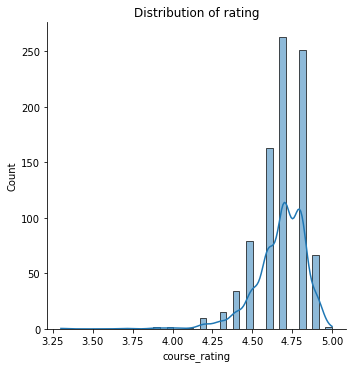

In [126]:
# distribution of ratings
plt.figure(figsize=(15,6))
sns.displot(data=courses, x="course_rating", kde=True).set(title='Distribution of rating')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


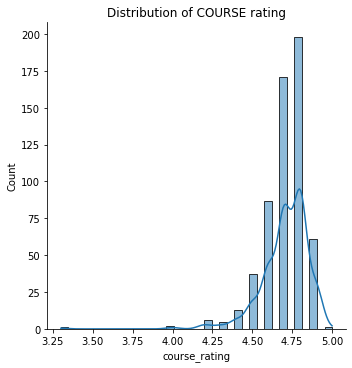

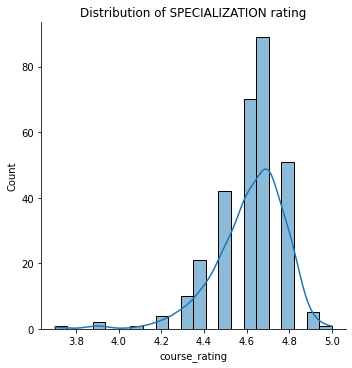

In [138]:
sns.displot(data=courses[courses['course_Certificate_type']=='COURSE'], x="course_rating", kde=True,ax=ax[0]).set(title='Distribution of COURSE rating')
sns.displot(data=courses[courses['course_Certificate_type']=='SPECIALIZATION'], x="course_rating", kde=True,ax=ax[0]).set(title='Distribution of SPECIALIZATION rating')



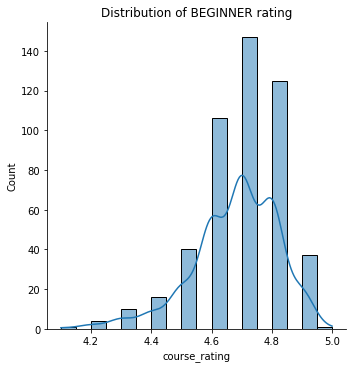

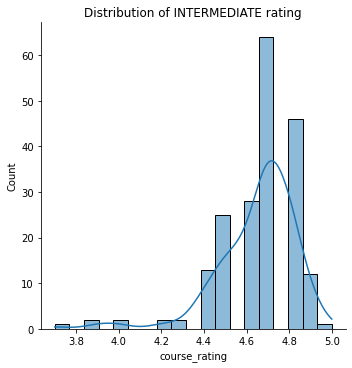

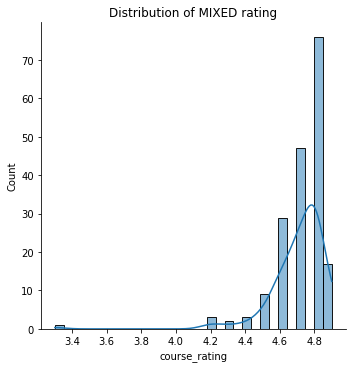

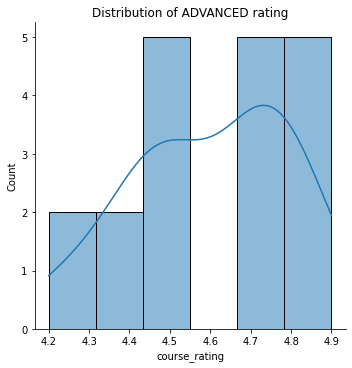

In [164]:
sns.displot(data=courses[courses['course_difficulty']=='BEGINNER'], x="course_rating", kde=True).set(title='Distribution of BEGINNER rating')
sns.displot(data=courses[courses['course_difficulty']=='INTERMEDIATE'], x="course_rating", kde=True).set(title='Distribution of INTERMEDIATE rating')
sns.displot(data=courses[courses['course_difficulty']=='MIXED'], x="course_rating", kde=True).set(title='Distribution of MIXED rating')
sns.displot(data=courses[courses['course_difficulty']=='ADVANCED'], x="course_rating", kde=True).set(title='Distribution of ADVANCED rating')


Average Rating is quite higher compared to minimum value.

##### course_Certificate_type has 3 null entries we will fill it by mode(most frequent value)

In [34]:
# check null values in course_Certificate_type
courses[courses['course_Certificate_type'].isna()]

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
79,80,BASIC STATISTICS,UNIVERSITY OF AMSTERDAM,NaN,4.6,BEGINNER,180K
105,106,BUILDING CONVERSATIONAL EXPERIENCES WITH DIALO...,GOOGLE CLOUD,NaN,4.5,BEGINNER,22K
127,128,CAMINO A LA EXCELENCIA EN GESTIÓN DE PROYECTOS,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,NaN,4.7,BEGINNER,340K


In [35]:
# get mode i.e. most frequent value
courses['course_Certificate_type'].mode()

0    COURSE
dtype: object

In [36]:
# fill null values with mode
courses['course_Certificate_type'].fillna("COURSE",inplace=True)

In [37]:
# Now there are no missing values
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.No                      891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


##### Process course_students_enrolled Column as it contains values in string and both in millions(M) and thousands(K)

In [38]:
courses['course_students_enrolled'].str[-1].unique()

array(['K', 'M'], dtype=object)

In [39]:
# function to convert enrolled students in K's 
def process_course_students_enrolled(X):
    if X[-1] == 'K':
        
        return float(X[:-1])
    if X[-1] == 'M':
        return float(X[:-1])*1000
    else:
        return -1

In [40]:
courses['Enrolled(In K)']=courses['course_students_enrolled'].apply(lambda X : process_course_students_enrolled(X))

In [41]:
courses['Enrolled(In K)'].describe()

count     891.000000
mean       90.552076
std       181.936454
min         1.500000
25%        17.500000
50%        42.000000
75%        99.500000
max      3200.000000
Name: Enrolled(In K), dtype: float64

In [42]:
# check for higher numbers. Here are few values which in millions and those are kind of outliers in data but we will keep it in data for descriptive analysis 
courses.sort_values(by='Enrolled(In K)',ascending=False)['Enrolled(In K)'].head(20)

564    3200.0
815    2500.0
688    1500.0
674    1300.0
196     830.0
129     790.0
261     760.0
765     750.0
199     740.0
211     690.0
626     630.0
426     610.0
18      540.0
113     510.0
296     490.0
420     480.0
691     480.0
56      480.0
313     470.0
678     440.0
Name: Enrolled(In K), dtype: float64

[Text(0.5, 1.0, 'Distribution of Student Enrolled')]

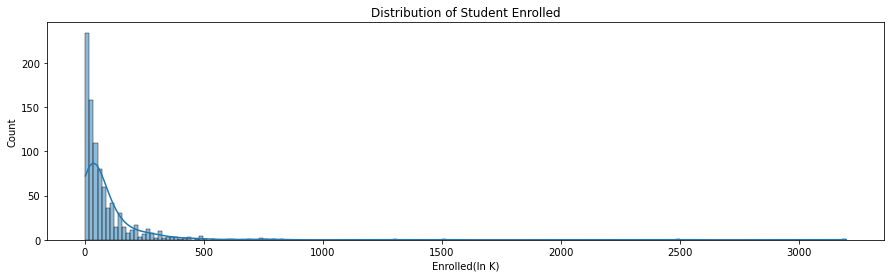

In [43]:
# histplot describe the distribution is right skewed as it has some courses with huge numbers of enroll.
plt.figure(figsize=(15,4))
sns.histplot(data=courses, x="Enrolled(In K)", kde=True).set(title='Distribution of Student Enrolled')

### Cobine Two dataset

In [44]:
courses.head()

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K)
0,1,(ISC)² SYSTEMS SECURITY CERTIFIED PRACTITIONER...,(ISC)²,SPECIALIZATION,4.7,BEGINNER,5.3K,5.3
1,2,A CRASH COURSE IN CAUSALITY: INFERRING CAUSAL ...,UNIVERSITY OF PENNSYLVANIA,COURSE,4.7,INTERMEDIATE,17K,17.0
2,3,A CRASH COURSE IN DATA SCIENCE,JOHNS HOPKINS UNIVERSITY,COURSE,4.5,MIXED,130K,130.0
3,4,A LAW STUDENT'S TOOLKIT,YALE UNIVERSITY,COURSE,4.7,MIXED,91K,91.0
4,5,A LIFE OF HAPPINESS AND FULFILLMENT,INDIAN SCHOOL OF BUSINESS,COURSE,4.8,MIXED,320K,320.0


In [45]:
rating.head()

,Min Rating,Max Rating,Feedback Categegory
0,4.8,5.00,Excellent
1,4.5,4.79,Good
2,4.0,4.49,Average
3,3.5,3.99,Below Average
4,3.0,3.49,Not Good


In [46]:
courses['course_rating'].describe()

count    891.000000
mean       4.677329
std        0.161600
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: course_rating, dtype: float64

In [47]:
# function to add feedback category in course
def addfeedback(X):
    if (X >= 3) & (X <= 3.49):
        return "Not Good"
    elif (X >= 3.5) & (X <= 3.99):
        return "Below Average"
    elif (X >= 4) & (X <= 4.49):
        return "Average"
    elif (X >= 4.5) & (X <= 4.79):
        return "Good"
    elif (X >= 4.8) & (X <= 5):
        return "Excellent"
    else:
        return "NA"

In [48]:
# add feedback category in courses dataset
courses['Feedback_Category'] = courses['course_rating'].apply(lambda X : addfeedback(X))

In [49]:
courses.head()

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K),Feedback_Category
0,1,(ISC)² SYSTEMS SECURITY CERTIFIED PRACTITIONER...,(ISC)²,SPECIALIZATION,4.7,BEGINNER,5.3K,5.3,Good
1,2,A CRASH COURSE IN CAUSALITY: INFERRING CAUSAL ...,UNIVERSITY OF PENNSYLVANIA,COURSE,4.7,INTERMEDIATE,17K,17.0,Good
2,3,A CRASH COURSE IN DATA SCIENCE,JOHNS HOPKINS UNIVERSITY,COURSE,4.5,MIXED,130K,130.0,Good
3,4,A LAW STUDENT'S TOOLKIT,YALE UNIVERSITY,COURSE,4.7,MIXED,91K,91.0,Good
4,5,A LIFE OF HAPPINESS AND FULFILLMENT,INDIAN SCHOOL OF BUSINESS,COURSE,4.8,MIXED,320K,320.0,Excellent


In [50]:
courses.columns

Index(['S.No', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled', 'Enrolled(In K)', 'Feedback_Category'],
      dtype='object')

In [51]:
#remove course_students_enrolled column
courses = courses[['S.No', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty', 'Enrolled(In K)', 'Feedback_Category']]

## Descriptive Analysis

1. There are total 891 titles having average raing of 4.67 with 80681.9K students enrolled for the courses. Where 57% courses have a "Good" rating while 36% courses have an "Excellent" rating.
2. Out of the total students who enrolled for courses, 50% opted for Beginner courses followed by Mixed(30%), Intermediate(17%) and Advanced(2%).
3. In both, Beginner and Intermediate difficulty level titles, 60% titles have "Good" feedback. Only Mixed diificulty level has more percentage of "Excellent"(50%) courses than "Good"(45%) courses.
5. Out of total Certificate types, 65% are Courses, 33% are Specialization and 1% are Professional Certificate.
6. Titles under "Course" certification type have nearly same number of Excellent(45%) and Good(51%) feedback while there is a significant variation between the number of Good(68%) and Excellent(19%) feedback for the titles under "Specialization" certificate type.
7. The Course "How To Create a Website in a Weekend! (Project-Centered Course)" of Mixed difficulty from "THE STATE UNIVERSITY OF NEW YORK" Organization is the only course which has feedback category as "Not Good".
8. Standford University(16 titles) has the highest(303.3K) Avg Student per course among all Organizations follwed by Yale University(17 titles) with 232.4K Avg students per course.
9. For Enrolled students there are 78 records as outliers. Courses having students greater than 222.5K are outlier in our data. Out of 78 titles, 44 have "Good" feedback while 31 have "Excellent" feedback.


### Insights:
1. There were a total of 21 organizations that provided more than 10 courses each. It was observed that out of the total students, more than 65% belonged to these 21 organizations. Thus, It can be implied that the increase in the number of courses in an organization attracts more students.
2. Among the organizations that provide more than 10 courses, "University of Colorado System" has least number of Avg Students per course (21K). A potential reason for this could be that out of its total 13 courses, 84% are specialized. This phenomenon can be observed in other organizations with less students also. Thus, It can be implied that the organizations that are more leaned towards providing specialized courses have lesser Students as less people opt for Specialized courses.
3. Average rating is quite higher as compared to minimum rating of data. Distribution of rating for "Course" as certificate has same distribution as overall rating but for "specialization" the distribution is more smothen(less up and down).
3. Average rating is quite higher as compared to minimum rating of data. The distribution of rating for "Course" fpr certificate type is same as overall rating distribution but for "specialization" the distribution is more smothened (less up and down).

In [165]:
# Average rating
courses['course_rating'].mean()

4.677328843995506

In [146]:
# Average rating by course_Certificate_type
courses.groupby('course_Certificate_type').agg({'course_rating':'mean'}).reset_index()

,course_Certificate_type,course_rating
0,COURSE,4.707732
1,PROFESSIOAL CERTIFICATE,4.683333
2,SPECIALIZATION,4.617508


In [145]:
# Average rating by course_difficulty
courses.groupby('course_difficulty').agg({'course_rating':'mean'}).reset_index()

,course_difficulty,course_rating
0,ADVANCED,4.600000
1,BEGINNER,4.679877
2,INTERMEDIATE,4.648485
3,MIXED,4.709091


In [140]:
# Number of titles by Feedback Category
feedbacks = courses.groupby('Feedback_Category').agg({'course_title':'count'}).reset_index()
feedbacks

,Feedback_Category,course_title
0,Average,62
1,Below Average,3
2,Excellent,320
3,Good,505
4,Not Good,1


* The Course "How To Create a Website in a Weekend! (Project-Centered Course)" of Mixed difficulty from "THE STATE UNIVERSITY OF NEW YORK" Organization is the only course which has feedback category as "Not Good".<br>
* 57% courses have "Good" rating while 36% courses have "Excellent" rating.

In [53]:
# There is only one course with "Not Good" feedback 
courses[courses['Feedback_Category']=='Not Good']

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,Enrolled(In K),Feedback_Category
413,414,HOW TO CREATE A WEBSITE IN A WEEKEND! (PROJECT...,THE STATE UNIVERSITY OF NEW YORK,COURSE,3.3,MIXED,140.0,Not Good


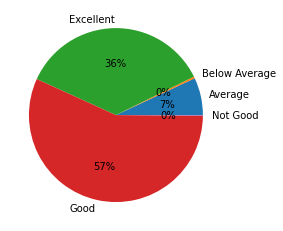

In [54]:
# % of cources by feedback category
plt.pie(feedbacks['course_title'],labels=feedbacks['Feedback_Category'], autopct='%.0f%%')
plt.show()

#### FeedBack by course_difficulty

In [55]:
# % of titles by course_difficulty
course_diff = courses.groupby('course_difficulty').agg({'course_title':'count'}).reset_index()
course_diff['percent']=(course_diff['course_title']/891)*100
course_diff

,course_difficulty,course_title,percent
0,ADVANCED,19,2.132435
1,BEGINNER,487,54.657688
2,INTERMEDIATE,198,22.222222
3,MIXED,187,20.987654


In [56]:
# % of titles by Course_difficulty and Feedback_Category
TitleCountby_diff_feedback = courses.groupby(['course_difficulty','Feedback_Category']).agg({'course_title':'count'}).reset_index()
TitleCountby_diff = courses.groupby(['course_difficulty']).agg({'course_title':'count'}).reset_index()
feedbackPercent = pd.merge(TitleCountby_diff_feedback,TitleCountby_diff,on='course_difficulty')
feedbackPercent['percent']=(feedbackPercent['course_title_x'] / feedbackPercent['course_title_y'])*100

In [57]:
feedbackPercent

,course_difficulty,Feedback_Category,course_title_x,course_title_y,percent
0,ADVANCED,Average,4,19,21.052632
1,ADVANCED,Excellent,5,19,26.315789
2,ADVANCED,Good,10,19,52.631579
3,BEGINNER,Average,31,487,6.365503
4,BEGINNER,Excellent,163,487,33.470226
5,BEGINNER,Good,293,487,60.164271
6,INTERMEDIATE,Average,19,198,9.595960
7,INTERMEDIATE,Below Average,3,198,1.515152
8,INTERMEDIATE,Excellent,59,198,29.797980
9,INTERMEDIATE,Good,117,198,59.090909


* In both, Beginner and Intermediate difficulty level titles, 60% titles have Good feedback.<br>
* Only Mixed diificulty level has more percentage of Excellent(50%) courses than Good(45%) courses.

In [58]:
# pivot table for creating visualization for number of courses
pivot_percent = feedbackPercent.pivot_table(values='percent',aggfunc='sum',index='course_difficulty',columns='Feedback_Category').reset_index()
pivot_count = feedbackPercent.pivot_table(values='course_title_x',aggfunc='sum',index='course_difficulty',columns='Feedback_Category').reset_index()

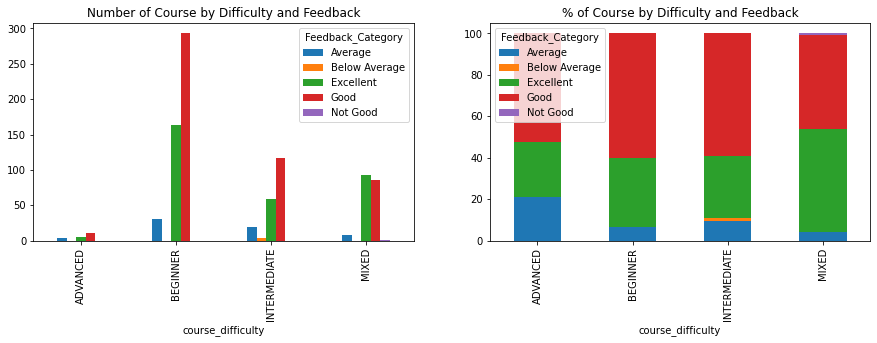

In [59]:
# bar chart to display number of titles and 
fig, ax = plt.subplots(1, 2, figsize=(15,4))
pivot_count.set_index('course_difficulty').plot(kind='bar',ax=ax[0],title='Number of Course by Difficulty and Feedback')
pivot_percent.set_index('course_difficulty').plot(kind='bar',stacked=True,ax=ax[1],title='% of Course by Difficulty and Feedback')
plt.show()

#### FeedBack by course_Certificate_type

In [60]:
# number of course_Certificate_type in data
courses['course_Certificate_type'].value_counts()

COURSE                     582
SPECIALIZATION             297
PROFESSIOAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

In [61]:
## overview of course_Certificate_type column
print('-------course_Certificate_type-------')
print('% of Courses:', (582/891)*100)
print('% of SPECIALIZATION:', (297/891)*100)
print('% of PROFESSIOAL CERTIFICATE :', (12/891)*100)

-------course_Certificate_type-------
% of Courses: 65.31986531986533
% of SPECIALIZATION: 33.33333333333333
% of PROFESSIOAL CERTIFICATE : 1.3468013468013467


* Out of total Certificate types, 65% are Courses, 33% are Specialization and 1% are Professional Certificate.

In [62]:
# calculated number of courses by course_Certificate_type and Feedback_Category
TitleCountby_Cert_feedback = courses.groupby(['course_Certificate_type','Feedback_Category']).agg({'course_title':'count'}).reset_index()
TitleCountby_Cert = courses.groupby(['course_Certificate_type']).agg({'course_title':'count'}).reset_index()
feedbackPercent_cert = pd.merge(TitleCountby_Cert_feedback,TitleCountby_Cert,on='course_Certificate_type')
feedbackPercent_cert['percent']=(feedbackPercent_cert['course_title_x'] / feedbackPercent_cert['course_title_y'])*100

* Titles under "Course" certification type have nearly same number of Excellent(45%) and Good(51%) feedback while there is a significant variation between the number of Good(68%) and Excellent(19%) feedback for the titles under "Specialization" certificate type.


In [63]:
feedbackPercent_cert

,course_Certificate_type,Feedback_Category,course_title_x,course_title_y,percent
0,COURSE,Average,26,582,4.467354
1,COURSE,Excellent,260,582,44.673540
2,COURSE,Good,295,582,50.687285
3,COURSE,Not Good,1,582,0.171821
4,PROFESSIOAL CERTIFICATE,Excellent,3,12,25.000000
5,PROFESSIOAL CERTIFICATE,Good,9,12,75.000000
6,SPECIALIZATION,Average,36,297,12.121212
7,SPECIALIZATION,Below Average,3,297,1.010101
8,SPECIALIZATION,Excellent,57,297,19.191919
9,SPECIALIZATION,Good,201,297,67.676768


In [64]:
# calculated number of courses by course_Certificate_type,course_difficulty and Feedback_Category
Feedbackby_Cert_diff = courses.groupby(['course_Certificate_type','course_difficulty','Feedback_Category']).agg({'course_title':'count'}).reset_index()
Feedbackby_Cert_diff

,course_Certificate_type,course_difficulty,Feedback_Category,course_title
0,COURSE,ADVANCED,Excellent,3
1,COURSE,ADVANCED,Good,6
2,COURSE,BEGINNER,Average,10
3,COURSE,BEGINNER,Excellent,123
4,COURSE,BEGINNER,Good,149
5,COURSE,INTERMEDIATE,Average,8
6,COURSE,INTERMEDIATE,Excellent,41
7,COURSE,INTERMEDIATE,Good,55
8,COURSE,MIXED,Average,8
9,COURSE,MIXED,Excellent,93


##### Analysis by Organization

In [127]:
# number of course titles and Enrolled students in Organization
ByOrganization = courses.groupby(['course_organization']).agg({'course_title':'count','Enrolled(In K)':'sum','course_rating':'mean'}).reset_index().sort_values(by='course_title',ascending=False)
# add average student per course in a organization
ByOrganization['Avg_Student_per_Course']=ByOrganization['Enrolled(In K)']/ByOrganization['course_title']

In [128]:
ByOrganization.head(5)

,course_organization,course_title,Enrolled(In K),course_rating,Avg_Student_per_Course
137,UNIVERSITY OF PENNSYLVANIA,59,5501.3,4.700000,93.242373
134,UNIVERSITY OF MICHIGAN,41,7437.7,4.724390,181.407317
35,GOOGLE CLOUD,34,2604.3,4.588235,76.597059
21,DUKE UNIVERSITY,28,3967.6,4.664286,141.700000
49,JOHNS HOPKINS UNIVERSITY,28,4298.9,4.657143,153.532143


In [129]:
courses.groupby(['course_organization']).agg({'Enrolled(In K)':'sum'}).reset_index().sort_values(by='Enrolled(In K)',ascending=False).head(10)

,course_organization,Enrolled(In K)
134,UNIVERSITY OF MICHIGAN,7437.7
137,UNIVERSITY OF PENNSYLVANIA,5501.3
86,STANFORD UNIVERSITY,4854.0
122,"UNIVERSITY OF CALIFORNIA, IRVINE",4326.0
49,JOHNS HOPKINS UNIVERSITY,4298.9
21,DUKE UNIVERSITY,3967.6
149,YALE UNIVERSITY,3952.0
39,IBM,2956.4
20,DEEPLEARNING.AI,2863.4
35,GOOGLE CLOUD,2604.3


In [130]:
# Organizations having more than 10 courses
morethan10courses=ByOrganization[ByOrganization['course_title']>10]

In [131]:
# corerelation of course_rating and Enrolled(In K)
courses[['course_rating','Enrolled(In K)']].corr()

,course_rating,Enrolled(In K)
course_rating,1.000000,0.072742
Enrolled(In K),0.072742,1.000000


* Among the organizations that provide more than 10 courses, "University of Colorado System" has least number of Avg Students per course (21K). A potential reason for this could be that out of its total 13 courses, 84% are specialized. This phenomenon can be observed in other organizations with less students also. Thus, It can be implied that the organizations that are more leaned towards providing specialized courses have lesser Students as less people opt for Specialized courses.


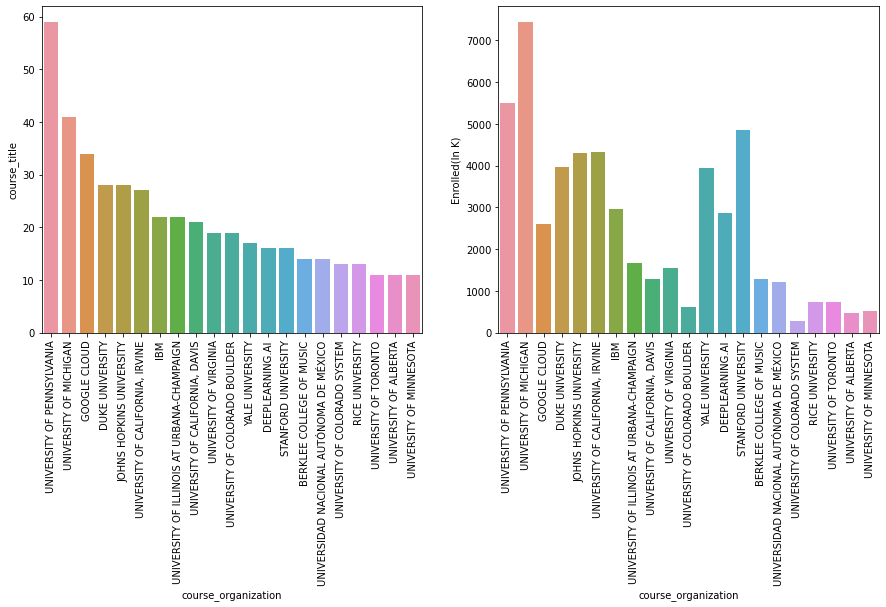

In [132]:
# visuals to check the performance of Organization which offers more than 10 courses
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.barplot(data = morethan10courses,x='course_organization',y='course_title',ax=ax[0])
sns.barplot(data = morethan10courses,x='course_organization',y='Enrolled(In K)',ax=ax[1])
ax[0].set_xticklabels(labels =morethan10courses['course_organization'], rotation=90)
ax[1].set_xticklabels(labels =morethan10courses['course_organization'], rotation=90)
plt.show()


* There were a total of 21 organizations that provided more than 10 courses each. It was observed that out of the total students, more than 65% belonged to these 21 organizations. Thus, It can be implied that the increase in the number of courses in an organization attracts more students.

In [133]:
print('Total Unique Organization:',courses['course_organization'].unique().shape[0])
print('Total Number of Courses:',ByOrganization['course_title'].sum())
print('Total Enrolled Students:',courses['Enrolled(In K)'].sum())
print('------------------------------------------------')
print('Number of Organizations which provide more than 10 courses:',morethan10courses.shape[0])
print('Number of courses in  Organizations which provide more than 10 courses:',morethan10courses['course_title'].sum())
print('Enrolled in Organizations which provide more than 10 courses:',morethan10courses['Enrolled(In K)'].sum())
print('------------------------------------------------')
print('% of couses in Organization which provide more than 10 courses:',
      (morethan10courses['course_title'].sum()/ByOrganization['course_title'].sum())*100)
print('% of students in Organization which provide more than 10 courses:',
      (morethan10courses['Enrolled(In K)'].sum()/courses['Enrolled(In K)'].sum())*100)

Total Unique Organization: 154
Total Number of Courses: 891
Total Enrolled Students: 80681.9
------------------------------------------------
Number of Organizations which provide more than 10 courses: 21
Number of courses in  Organizations which provide more than 10 courses: 456
Enrolled in Organizations which provide more than 10 courses: 53140.1
------------------------------------------------
% of couses in Organization which provide more than 10 courses: 51.178451178451176
% of students in Organization which provide more than 10 courses: 65.86371912411582


* Standford University(16 titles) has the highest(303.3K) Avg Student per course among all Organizations follwed by Yale University(17 titles) with 232.4K Avg student per course.

In [134]:
ByOrganization.sort_values(by='Avg_Student_per_Course',ascending=False).head(10)

,course_organization,course_title,Enrolled(In K),course_rating,Avg_Student_per_Course
86,STANFORD UNIVERSITY,16,4854.0,4.768750,303.375000
149,YALE UNIVERSITY,17,3952.0,4.817647,232.470588
59,MCMASTER UNIVERSITY,1,230.0,4.800000,230.000000
34,GOOGLE - SPECTRUM SHARING,1,210.0,4.900000,210.000000
53,LUDWIG-MAXIMILIANS-UNIVERSITÄT MÜNCHEN (LMU),2,385.0,4.750000,192.500000
152,ÉCOLE POLYTECHNIQUE,1,190.0,4.800000,190.000000
134,UNIVERSITY OF MICHIGAN,41,7437.7,4.724390,181.407317
31,GEORGIA INSTITUTE OF TECHNOLOGY,10,1813.0,4.660000,181.300000
20,DEEPLEARNING.AI,16,2863.4,4.750000,178.962500
141,UNIVERSITY OF WASHINGTON,5,837.0,4.660000,167.400000


In [73]:
# number of titles by org and certificate
titlescountby_org_cert=courses.groupby(['course_organization','course_Certificate_type']).agg({'course_title':'count','Enrolled(In K)':'sum'}).reset_index()
# convert certificate from rows to column
certificatedata=titlescountby_org_cert.pivot_table(values='course_title',aggfunc='sum',columns='course_Certificate_type',index='course_organization').reset_index()
#merge in one dataset to look easy for analysis
mergeddata = pd.merge(ByOrganization,certificatedata,on='course_organization')

# Add percentage of each certificate in each org
mergeddata['COURSE %'] = (mergeddata['COURSE']/mergeddata['course_title'])*100
mergeddata['PROFESSIOAL CERTIFICATE %'] = (mergeddata['PROFESSIOAL CERTIFICATE']/mergeddata['course_title'])*100
mergeddata['SPECIALIZATION %'] = (mergeddata['SPECIALIZATION']/mergeddata['course_title'])*100

In [74]:
mergeddata.head()

,course_organization,course_title,Enrolled(In K),Avg_Student_per_Course,COURSE,PROFESSIOAL CERTIFICATE,SPECIALIZATION,COURSE %,PROFESSIOAL CERTIFICATE %,SPECIALIZATION %
0,UNIVERSITY OF PENNSYLVANIA,59,5501.3,93.242373,44.0,NaN,15.0,74.576271,NaN,25.423729
1,UNIVERSITY OF MICHIGAN,41,7437.7,181.407317,30.0,NaN,11.0,73.170732,NaN,26.829268
2,GOOGLE CLOUD,34,2604.3,76.597059,17.0,2.0,15.0,50.000000,5.882353,44.117647
3,DUKE UNIVERSITY,28,3967.6,141.700000,22.0,NaN,6.0,78.571429,NaN,21.428571
4,JOHNS HOPKINS UNIVERSITY,28,4298.9,153.532143,17.0,NaN,11.0,60.714286,NaN,39.285714


In [136]:
mergeddata.sort_values(by='course_title',ascending=False).head(20)

,course_organization,course_title,Enrolled(In K),Avg_Student_per_Course,COURSE,PROFESSIOAL CERTIFICATE,SPECIALIZATION,COURSE %,PROFESSIOAL CERTIFICATE %,SPECIALIZATION %
0,UNIVERSITY OF PENNSYLVANIA,59,5501.3,93.242373,44.0,NaN,15.0,74.576271,NaN,25.423729
1,UNIVERSITY OF MICHIGAN,41,7437.7,181.407317,30.0,NaN,11.0,73.170732,NaN,26.829268
2,GOOGLE CLOUD,34,2604.3,76.597059,17.0,2.0,15.0,50.000000,5.882353,44.117647
4,JOHNS HOPKINS UNIVERSITY,28,4298.9,153.532143,17.0,NaN,11.0,60.714286,NaN,39.285714
3,DUKE UNIVERSITY,28,3967.6,141.700000,22.0,NaN,6.0,78.571429,NaN,21.428571
5,"UNIVERSITY OF CALIFORNIA, IRVINE",27,4326.0,160.222222,12.0,1.0,14.0,44.444444,3.703704,51.851852
6,IBM,22,2956.4,134.381818,13.0,3.0,6.0,59.090909,13.636364,27.272727
7,UNIVERSITY OF ILLINOIS AT URBANA-CHAMPAIGN,22,1679.0,76.318182,10.0,NaN,12.0,45.454545,NaN,54.545455
8,"UNIVERSITY OF CALIFORNIA, DAVIS",21,1278.7,60.890476,11.0,NaN,10.0,52.380952,NaN,47.619048
9,UNIVERSITY OF VIRGINIA,19,1556.0,81.894737,16.0,NaN,3.0,84.210526,NaN,15.789474


##### Analyze Enrolled students

<AxesSubplot:xlabel='Enrolled(In K)', ylabel='Count'>

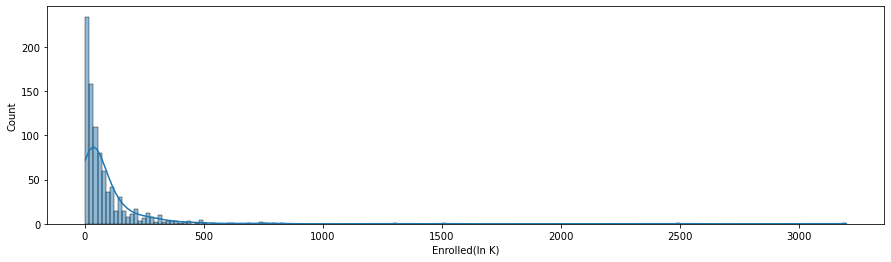

In [79]:
#Right Skewed
plt.figure(figsize=(15,4))
sns.histplot(courses['Enrolled(In K)'],kde=True)

##### Check Outlier
Will use box plot to check if there are any outliers in data.<br>
To get lower and upper bound for deciding outliers will use IQR.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Enrolled(In K)'>

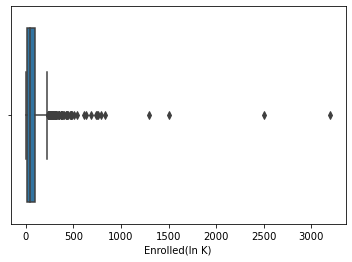

In [80]:
sns.boxplot((courses['Enrolled(In K)']))

In [81]:
(courses['Enrolled(In K)']).describe()

count     891.000000
mean       90.552076
std       181.936454
min         1.500000
25%        17.500000
50%        42.000000
75%        99.500000
max      3200.000000
Name: Enrolled(In K), dtype: float64

In [82]:
# IQR to find outliers
Q1 = np.percentile(courses['Enrolled(In K)'], 25)
Q3 = np.percentile(courses['Enrolled(In K)'], 75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print(Q1,Q3,IQR,lower,upper)

17.5 99.5 82.0 -105.5 222.5


In [83]:
outliers=courses[courses['Enrolled(In K)']>upper]

In [84]:
outliers['Feedback_Category'].value_counts()

Good         44
Excellent    31
Average       3
Name: Feedback_Category, dtype: int64

* For Enrolled student there are 78 records as outliers. Courses having students greater than 222.5K are outlier in our data. Out of 78 titles, 44 have Good feedback while 31 have Excellent feedback.

<AxesSubplot:xlabel='Enrolled(In K)', ylabel='Count'>

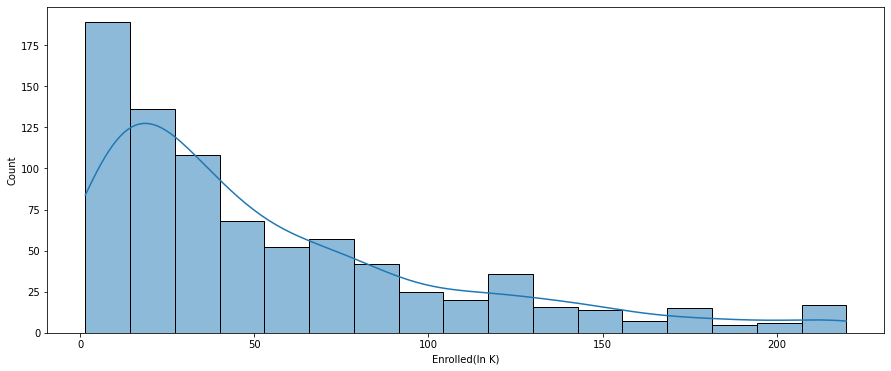

In [85]:
#Distribution after removing outliers
plt.figure(figsize=(15,6))
sns.histplot((courses[courses['Enrolled(In K)']<upper]['Enrolled(In K)']),kde=True)

In [86]:
studentby_diff=courses.groupby(['course_difficulty']).agg({'Enrolled(In K)':'sum'}).reset_index()
studentby_diff

,course_difficulty,Enrolled(In K)
0,ADVANCED,1264.4
1,BEGINNER,39921.8
2,INTERMEDIATE,14506.3
3,MIXED,24989.4


In [87]:
courses['Enrolled(In K)'].sum()

80681.9

In [88]:
studentby_diff['percent']=(studentby_diff['Enrolled(In K)']/courses['Enrolled(In K)'].sum())*100

In [89]:
studentby_diff

,course_difficulty,Enrolled(In K),percent
0,ADVANCED,1264.4,1.567142
1,BEGINNER,39921.8,49.480491
2,INTERMEDIATE,14506.3,17.979621
3,MIXED,24989.4,30.972746


* There are total 80681.9K students who enrolled for courses out of which 50% opted for Beginner courses followed by Mixed(30%), Intermediate(17%) and Advanced(2%).

In [90]:
courses.sort_values(by='Enrolled(In K)',ascending=False).head(10)

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,Enrolled(In K),Feedback_Category
564,565,MACHINE LEARNING,STANFORD UNIVERSITY,COURSE,4.9,MIXED,3200.0,Excellent
815,816,THE SCIENCE OF WELL-BEING,YALE UNIVERSITY,COURSE,4.9,MIXED,2500.0,Excellent
688,689,PYTHON FOR EVERYBODY,UNIVERSITY OF MICHIGAN,SPECIALIZATION,4.8,BEGINNER,1500.0,Excellent
674,675,PROGRAMMING FOR EVERYBODY (GETTING STARTED WIT...,UNIVERSITY OF MICHIGAN,COURSE,4.8,MIXED,1300.0,Excellent
196,197,DATA SCIENCE,JOHNS HOPKINS UNIVERSITY,SPECIALIZATION,4.5,BEGINNER,830.0,Good
129,130,CAREER SUCCESS,"UNIVERSITY OF CALIFORNIA, IRVINE",SPECIALIZATION,4.4,BEGINNER,790.0,Average
261,262,ENGLISH FOR CAREER DEVELOPMENT,UNIVERSITY OF PENNSYLVANIA,COURSE,4.8,MIXED,760.0,Excellent
765,766,SUCCESSFUL NEGOTIATION: ESSENTIAL STRATEGIES A...,UNIVERSITY OF MICHIGAN,COURSE,4.8,MIXED,750.0,Excellent
199,200,DATA SCIENCE: FOUNDATIONS USING R,JOHNS HOPKINS UNIVERSITY,SPECIALIZATION,4.6,BEGINNER,740.0,Good
211,212,DEEP LEARNING,DEEPLEARNING.AI,SPECIALIZATION,4.8,INTERMEDIATE,690.0,Excellent


## Suggest the Course

#### Which course do you recommend if a student who is new to python want to pursue Python course.
Provide details on what approach is followed to come up with recommendation.<br>
First filter the title having python in their name.<br>
Filter for Certificate as Course and Difficulty as Beginner because we need data for a person who is beginner in python<br>
Did not considered number courses offered by Org as a parameter for suggestions as some orgs may be specific for some courses<br>
Divide each value of Rating and Enrolled_student by their max values in filtered dataset<br>
Calculate Correlation of rating and Students for filtered dataset<br>
use below formula for updated rating % : <br> 
max(abs(Correlation),1-abs(Correlation)) * scaled_rating + (1-max(abs(Correlation),1-abs(Correlation))) * scaled_students <br>
We can use support of z-score to check if rating or students are -2 or more std deviation away and if we can remove them from filtered dataset<br>


In [92]:
Python_Beginner_courses = courses[(courses['course_title'].str.contains('PYTHON')) & (courses['course_difficulty']=='BEGINNER') & (courses['course_Certificate_type']=='COURSE')]
Python_Beginner_courses

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,Enrolled(In K),Feedback_Category
171,172,CRASH COURSE ON PYTHON,GOOGLE,COURSE,4.8,BEGINNER,81.0,Excellent
188,189,DATA ANALYSIS WITH PYTHON,IBM,COURSE,4.7,BEGINNER,110.0,Good
466,467,INTRODUCCIÓN A LA PROGRAMACIÓN EN PYTHON I: AP...,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,COURSE,4.4,BEGINNER,100.0,Average
530,531,INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO COM PYTHON ...,UNIVERSIDADE DE SÃO PAULO,COURSE,4.9,BEGINNER,120.0,Excellent
682,683,PYTHON BASICS,UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,110.0,Excellent
685,686,"PYTHON FUNCTIONS, FILES, AND DICTIONARIES",UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,26.0,Excellent
687,688,PYTHON FOR DATA SCIENCE AND AI,IBM,COURSE,4.6,BEGINNER,170.0,Good
841,842,UNDERSTANDING AND VISUALIZING DATA WITH PYTHON,UNIVERSITY OF MICHIGAN,COURSE,4.7,BEGINNER,30.0,Good
851,852,USING PYTHON TO INTERACT WITH THE OPERATING SY...,GOOGLE,COURSE,4.7,BEGINNER,19.0,Good
880,881,МАТЕМАТИКА И PYTHON ДЛЯ АНАЛИЗА ДАННЫХ,E-LEARNING DEVELOPMENT FUND,COURSE,4.8,BEGINNER,67.0,Excellent


In [179]:
Python_Beginner_courses.shape

(11, 13)

In [93]:
Python_Beginner_courses['transform_course_rating']=Python_Beginner_courses['course_rating']/Python_Beginner_courses['course_rating'].max()
Python_Beginner_courses['transform_Enrolled(In K)']=Python_Beginner_courses['Enrolled(In K)']/Python_Beginner_courses['Enrolled(In K)'].max()

C:\Users\sande\AppData\Local\Temp/ipykernel_7812/3651087598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Python_Beginner_courses['transform_course_rating']=Python_Beginner_courses['course_rating']/Python_Beginner_courses['course_rating'].max()
C:\Users\sande\AppData\Local\Temp/ipykernel_7812/3651087598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Python_Beginner_courses['transform_Enrolled(In K)']=Python_Beginner_courses['Enrolled(In K)']/Python_Beginner_courses['Enrolled(In K)'].max()


In [94]:
# find correlation between course_rating and Enrolled(In K)
Python_Beginner_courses[['course_rating','Enrolled(In K)']].corr()

,course_rating,Enrolled(In K)
course_rating,1.000000,-0.177753
Enrolled(In K),-0.177753,1.000000


In [95]:

correlation1=Python_Beginner_courses[['course_rating','Enrolled(In K)']].corr()['Enrolled(In K)'][0]
correlation1=abs(correlation1)
correlation2=1-correlation1
max_correlation=max(correlation1,correlation2)
print(correlation1,correlation2,max_correlation)

0.17775279249444337 0.8222472075055567 0.8222472075055567


In [96]:
Python_Beginner_courses['Course_suggestion_Score'] = max_correlation * Python_Beginner_courses['transform_course_rating']+ (1-max_correlation) * Python_Beginner_courses['transform_Enrolled(In K)']

C:\Users\sande\AppData\Local\Temp/ipykernel_7812/84305618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Python_Beginner_courses['Course_suggestion_Score'] = max_correlation * Python_Beginner_courses['transform_course_rating']+ (1-max_correlation) * Python_Beginner_courses['transform_Enrolled(In K)']


In [97]:
Python_Beginner_courses

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,Enrolled(In K),Feedback_Category,transform_course_rating,transform_Enrolled(In K),Course_suggestion_Score
171,172,CRASH COURSE ON PYTHON,GOOGLE,COURSE,4.8,BEGINNER,81.0,Excellent,0.979592,0.476471,0.890161
188,189,DATA ANALYSIS WITH PYTHON,IBM,COURSE,4.7,BEGINNER,110.0,Good,0.959184,0.647059,0.903703
466,467,INTRODUCCIÓN A LA PROGRAMACIÓN EN PYTHON I: AP...,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,COURSE,4.4,BEGINNER,100.0,Average,0.897959,0.588235,0.842905
530,531,INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO COM PYTHON ...,UNIVERSIDADE DE SÃO PAULO,COURSE,4.9,BEGINNER,120.0,Excellent,1.000000,0.705882,0.947720
682,683,PYTHON BASICS,UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,110.0,Excellent,0.979592,0.647059,0.920483
685,686,"PYTHON FUNCTIONS, FILES, AND DICTIONARIES",UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,26.0,Excellent,0.979592,0.152941,0.832652
687,688,PYTHON FOR DATA SCIENCE AND AI,IBM,COURSE,4.6,BEGINNER,170.0,Good,0.938776,1.000000,0.949658
841,842,UNDERSTANDING AND VISUALIZING DATA WITH PYTHON,UNIVERSITY OF MICHIGAN,COURSE,4.7,BEGINNER,30.0,Good,0.959184,0.176471,0.820054
851,852,USING PYTHON TO INTERACT WITH THE OPERATING SY...,GOOGLE,COURSE,4.7,BEGINNER,19.0,Good,0.959184,0.111765,0.808553
880,881,МАТЕМАТИКА И PYTHON ДЛЯ АНАЛИЗА ДАННЫХ,E-LEARNING DEVELOPMENT FUND,COURSE,4.8,BEGINNER,67.0,Excellent,0.979592,0.394118,0.875522


In [98]:
Python_Beginner_courses.sort_values(by='Course_suggestion_Score',ascending=False)

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,Enrolled(In K),Feedback_Category,transform_course_rating,transform_Enrolled(In K),Course_suggestion_Score
687,688,PYTHON FOR DATA SCIENCE AND AI,IBM,COURSE,4.6,BEGINNER,170.0,Good,0.938776,1.000000,0.949658
530,531,INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO COM PYTHON ...,UNIVERSIDADE DE SÃO PAULO,COURSE,4.9,BEGINNER,120.0,Excellent,1.000000,0.705882,0.947720
682,683,PYTHON BASICS,UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,110.0,Excellent,0.979592,0.647059,0.920483
188,189,DATA ANALYSIS WITH PYTHON,IBM,COURSE,4.7,BEGINNER,110.0,Good,0.959184,0.647059,0.903703
171,172,CRASH COURSE ON PYTHON,GOOGLE,COURSE,4.8,BEGINNER,81.0,Excellent,0.979592,0.476471,0.890161
880,881,МАТЕМАТИКА И PYTHON ДЛЯ АНАЛИЗА ДАННЫХ,E-LEARNING DEVELOPMENT FUND,COURSE,4.8,BEGINNER,67.0,Excellent,0.979592,0.394118,0.875522
883,884,ОСНОВЫ ПРОГРАММИРОВАНИЯ НА PYTHON,NATIONAL RESEARCH UNIVERSITY HIGHER SCHOOL OF ...,COURSE,4.6,BEGINNER,83.0,Good,0.938776,0.488235,0.858691
466,467,INTRODUCCIÓN A LA PROGRAMACIÓN EN PYTHON I: AP...,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,COURSE,4.4,BEGINNER,100.0,Average,0.897959,0.588235,0.842905
685,686,"PYTHON FUNCTIONS, FILES, AND DICTIONARIES",UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,26.0,Excellent,0.979592,0.152941,0.832652
841,842,UNDERSTANDING AND VISUALIZING DATA WITH PYTHON,UNIVERSITY OF MICHIGAN,COURSE,4.7,BEGINNER,30.0,Good,0.959184,0.176471,0.820054


In [168]:
rate_std=Python_Beginner_courses['course_rating'].std()
rate_mean=Python_Beginner_courses['course_rating'].mean()

Enroll_std=Python_Beginner_courses['Enrolled(In K)'].std()
Enroll_mean=Python_Beginner_courses['Enrolled(In K)'].mean()

In [169]:
Python_Beginner_courses['rate_ZScore'] = (Python_Beginner_courses['course_rating']-rate_mean)/rate_std
Python_Beginner_courses['Enroll_ZScore'] = (Python_Beginner_courses['Enrolled(In K)']-Enroll_mean)/Enroll_std

C:\Users\sande\AppData\Local\Temp/ipykernel_7812/2805801103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Python_Beginner_courses['rate_ZScore'] = (Python_Beginner_courses['course_rating']-rate_mean)/rate_std
C:\Users\sande\AppData\Local\Temp/ipykernel_7812/2805801103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Python_Beginner_courses['Enroll_ZScore'] = (Python_Beginner_courses['Enrolled(In K)']-Enroll_mean)/Enroll_std


In [178]:
Python_Beginner_courses.sort_values(by = 'Course_suggestion_Score')

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,Enrolled(In K),Feedback_Category,transform_course_rating,transform_Enrolled(In K),Course_suggestion_Score,rate_ZScore,Enroll_ZScore
851,852,USING PYTHON TO INTERACT WITH THE OPERATING SY...,GOOGLE,COURSE,4.7,BEGINNER,19.0,Good,0.959184,0.111765,0.808553,-0.066111,-1.399279
841,842,UNDERSTANDING AND VISUALIZING DATA WITH PYTHON,UNIVERSITY OF MICHIGAN,COURSE,4.7,BEGINNER,30.0,Good,0.959184,0.176471,0.820054,-0.066111,-1.159798
685,686,"PYTHON FUNCTIONS, FILES, AND DICTIONARIES",UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,26.0,Excellent,0.979592,0.152941,0.832652,0.661107,-1.246882
466,467,INTRODUCCIÓN A LA PROGRAMACIÓN EN PYTHON I: AP...,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,COURSE,4.4,BEGINNER,100.0,Average,0.897959,0.588235,0.842905,-2.247765,0.364169
883,884,ОСНОВЫ ПРОГРАММИРОВАНИЯ НА PYTHON,NATIONAL RESEARCH UNIVERSITY HIGHER SCHOOL OF ...,COURSE,4.6,BEGINNER,83.0,Good,0.938776,0.488235,0.858691,-0.793329,-0.005938
880,881,МАТЕМАТИКА И PYTHON ДЛЯ АНАЛИЗА ДАННЫХ,E-LEARNING DEVELOPMENT FUND,COURSE,4.8,BEGINNER,67.0,Excellent,0.979592,0.394118,0.875522,0.661107,-0.354273
171,172,CRASH COURSE ON PYTHON,GOOGLE,COURSE,4.8,BEGINNER,81.0,Excellent,0.979592,0.476471,0.890161,0.661107,-0.049479
188,189,DATA ANALYSIS WITH PYTHON,IBM,COURSE,4.7,BEGINNER,110.0,Good,0.959184,0.647059,0.903703,-0.066111,0.581878
682,683,PYTHON BASICS,UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,110.0,Excellent,0.979592,0.647059,0.920483,0.661107,0.581878
530,531,INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO COM PYTHON ...,UNIVERSIDADE DE SÃO PAULO,COURSE,4.9,BEGINNER,120.0,Excellent,1.000000,0.705882,0.947720,1.388325,0.799588


### Alternate Approach based on bayesAvg 

In [171]:
pythoncourse = Python_Beginner_courses.copy()

bayesAvg = (ProductAvgRating * ProductRaingCount + C * m) / (ProductRaingCount + C)

In [173]:
C = pythoncourse['Enrolled(In K)'].mean() # confidence that should have atleast these many students we are taking mean
m = pythoncourse['course_rating'].mean()  # Average of ratinvg

In [174]:
pythoncourse['bayesAvg'] = ((pythoncourse['course_rating'] * pythoncourse['Enrolled(In K)']) + C * m) / (pythoncourse['Enrolled(In K)'] + C)

In [177]:
pythoncourse.sort_values(by='bayesAvg',ascending=False)

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,Enrolled(In K),Feedback_Category,transform_course_rating,transform_Enrolled(In K),Course_suggestion_Score,rate_ZScore,Enroll_ZScore,bayesAvg
530,531,INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO COM PYTHON ...,UNIVERSIDADE DE SÃO PAULO,COURSE,4.9,BEGINNER,120.0,Excellent,1.000000,0.705882,0.947720,1.388325,0.799588,4.821792
682,683,PYTHON BASICS,UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,110.0,Excellent,0.979592,0.647059,0.920483,0.661107,0.581878,4.760831
171,172,CRASH COURSE ON PYTHON,GOOGLE,COURSE,4.8,BEGINNER,81.0,Excellent,0.979592,0.476471,0.890161,0.661107,-0.049479,4.753917
880,881,МАТЕМАТИКА И PYTHON ДЛЯ АНАЛИЗА ДАННЫХ,E-LEARNING DEVELOPMENT FUND,COURSE,4.8,BEGINNER,67.0,Excellent,0.979592,0.394118,0.875522,0.661107,-0.354273,4.749623
685,686,"PYTHON FUNCTIONS, FILES, AND DICTIONARIES",UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,26.0,Excellent,0.979592,0.152941,0.832652,0.661107,-1.246882,4.730722
851,852,USING PYTHON TO INTERACT WITH THE OPERATING SY...,GOOGLE,COURSE,4.7,BEGINNER,19.0,Good,0.959184,0.111765,0.808553,-0.066111,-1.399279,4.707402
841,842,UNDERSTANDING AND VISUALIZING DATA WITH PYTHON,UNIVERSITY OF MICHIGAN,COURSE,4.7,BEGINNER,30.0,Good,0.959184,0.176471,0.820054,-0.066111,-1.159798,4.706683
188,189,DATA ANALYSIS WITH PYTHON,IBM,COURSE,4.7,BEGINNER,110.0,Good,0.959184,0.647059,0.903703,-0.066111,0.581878,4.703917
883,884,ОСНОВЫ ПРОГРАММИРОВАНИЯ НА PYTHON,NATIONAL RESEARCH UNIVERSITY HIGHER SCHOOL OF ...,COURSE,4.6,BEGINNER,83.0,Good,0.938776,0.488235,0.858691,-0.793329,-0.005938,4.654635
687,688,PYTHON FOR DATA SCIENCE AND AI,IBM,COURSE,4.6,BEGINNER,170.0,Good,0.938776,1.000000,0.949658,-0.793329,1.888136,4.635868
